In [1]:
# 1. Get essential libraries
from vnstock import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

Observations:  1635


<Axes: xlabel='Time'>

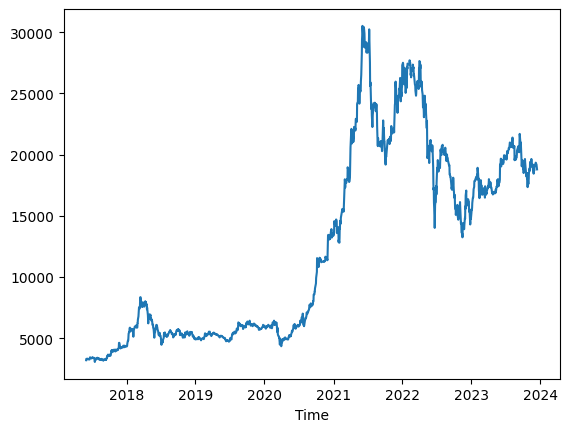

In [2]:
#2. Fetch data and visualize
# VIB
VIB = stock_historical_data(symbol = "VIB", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(VIB['Close']))
VIB["Close"].plot()

In [3]:
# Preprocessing
df = pd.DataFrame(VIB['Close'])
df = df.dropna() 
df = df.reset_index(drop=True)
df

,Close
0,3210
1,3320
2,3290
3,3320
4,3340
...,...
1630,19200
1631,19200
1632,19050
1633,18900


In [4]:
# Check stationary
from statsmodels.tsa.stattools import adfuller
adf1 = adfuller(df['Close'], regression ='c', maxlag=30)
print("ADF stat: %f" % adf1[0])
print("p-value: %f" % adf1[1])
#Not stationary

ADF stat: -1.537267
p-value: 0.515002


In [5]:
adf2 = adfuller(df['Close'].diff().dropna(), regression ='c', maxlag=30)
print("ADF stat: %f" % adf2[0])
print("p-value: %f" % adf2[1])
#Stationary

ADF stat: -5.366501
p-value: 0.000004


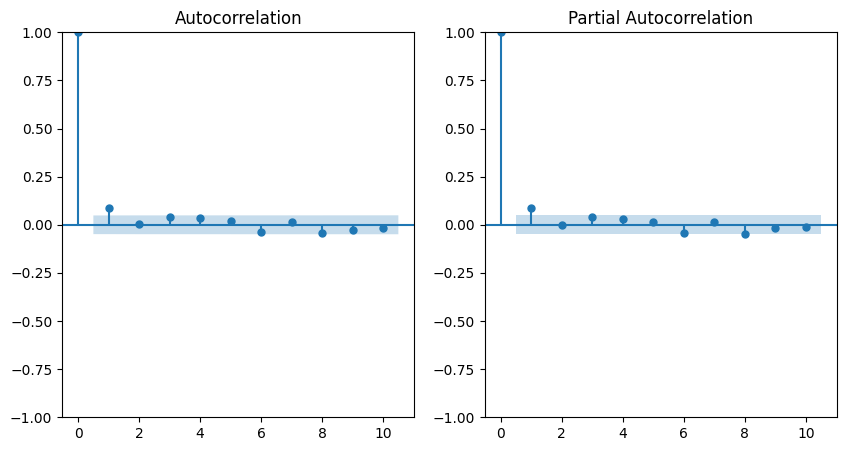

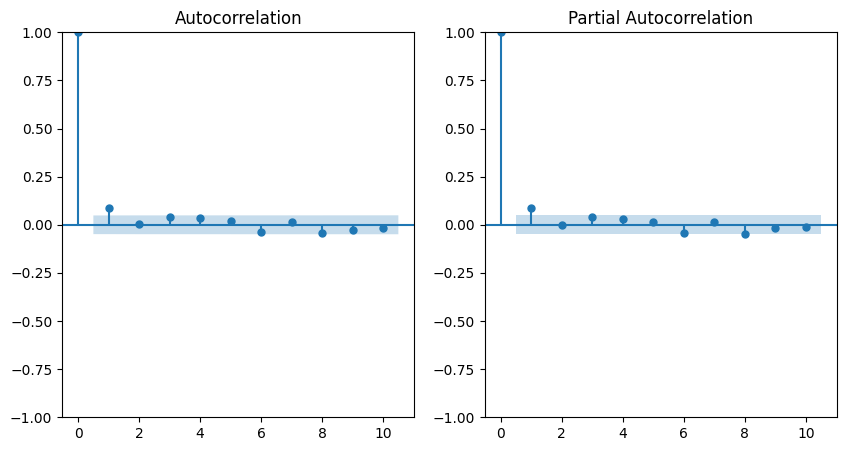

In [6]:
# Difference the data and plot the acf
fig, ax = plt.subplots(1,2,figsize=(10,5))
#ACF
sm.graphics.tsa.plot_acf(np.diff(df['Close']),lags=10, ax=ax[0])
# PACF
sm.graphics.tsa.plot_pacf(np.diff(df['Close']),lags=10, ax=ax[1])

In [7]:
#3. Slit the data into train : 
# Test with ratio 8:2
train_size82 = int(0.8 * len(df))
test_size82 = int(0.2 * len(df))

train_data82 = df[:train_size82]
test_data82 = df[train_size82:]

In [8]:
# 4. Training process
# 8 : 2 RATIO
x_train82 = np.array(train_data82.index).reshape(-1, 1)
y_train82 = np.array(train_data82['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model82 = auto_arima(y_train82, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model_fit82 = model82.fit(y_train82)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18893.605, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18906.214, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18892.132, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18892.257, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18906.079, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=18894.132, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18894.135, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18896.144, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=18891.615, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=18893.610, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=18893.599, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=18891.765, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=18895.616, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.888 seconds


In [9]:
# 5. Testing process
# 8:2 RATIO
x_test82 = np.array(test_data82.index).reshape(-1, 1)
y_test82 = np.array(test_data82['Close'])
y_pred82 = model82.predict(n_periods=len(y_test82))
len(y_pred82)

327

In [10]:
# 6. 60 days prediction
# 8:2 RATIO
last_index82 =  df.index[-1]
last_data82 =pd.RangeIndex(start=last_index82, stop=last_index82 + 60, step=1)

#create an array of 60 integers starting from last index
x_next_60_days82 = np.array(range(last_index82 + 1, last_index82 + 61)).reshape(-1, 1)

#predict the price for the next 60 days.
y_next_60_days82 = model82.predict(len(x_next_60_days82))

#print the prices for the next 60 days.
print('Predicted prices for the next 60 days: ')
print(y_next_60_days82)

Predicted prices for the next 60 days: 
[19711.05353413 19710.05304348 19709.94115779 19709.92864552
 19709.92724626 19709.92708978 19709.92707229 19709.92707033
 19709.92707011 19709.92707008 19709.92707008 19709.92707008
 19709.92707008 19709.92707008 19709.92707008 19709.92707008
 19709.92707008 19709.92707008 19709.92707008 19709.92707008
 19709.92707008 19709.92707008 19709.92707008 19709.92707008
 19709.92707008 19709.92707008 19709.92707008 19709.92707008
 19709.92707008 19709.92707008 19709.92707008 19709.92707008
 19709.92707008 19709.92707008 19709.92707008 19709.92707008
 19709.92707008 19709.92707008 19709.92707008 19709.92707008
 19709.92707008 19709.92707008 19709.92707008 19709.92707008
 19709.92707008 19709.92707008 19709.92707008 19709.92707008
 19709.92707008 19709.92707008 19709.92707008 19709.92707008
 19709.92707008 19709.92707008 19709.92707008 19709.92707008
 19709.92707008 19709.92707008 19709.92707008 19709.92707008]


In [12]:
# 7. Evaluation
# 8 : 2 RATIO
#RMSE
test_rmse = np.sqrt(np.mean((y_pred82 - y_test82)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test82 - y_pred82) / y_test82)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred82 - y_test82))
print('Testing MAE:', test_mae)

def MSLE (pred, actual):
    return np.mean((np.log(1+actual)-np.log(1+pred))*(np.log(1+actual)-np.log(1+pred)))
print("Testing MSLR: ", MSLE(y_pred82, y_test82))

Testing RMSE: 2581.2199892541284
Testing MAPE: 12.552181119165088
Testing MAE: 2063.1101710888447
Testing MSLR:  0.02144145327887208


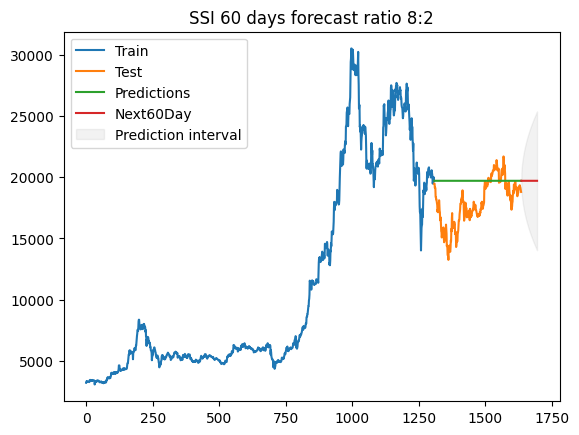

In [13]:
# 8:2 RATIO
# Forecast
n_periods = 60
fc, confint = model_fit82.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df['Close']), len(df['Close'])+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train_data82.index, train_data82['Close'])
plt.plot(test_data82.index, test_data82['Close'])
plt.plot(test_data82.index, y_pred82)

plt.plot(fc_series)
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.05)
plt.legend(['Train', 'Test', 'Predictions','Next60Day', 'Prediction interval'])

plt.title("SSI 60 days forecast ratio 8:2")
plt.show()

In [73]:
#### Forecast with ARIMA(2, 1, 2)
mode82 = sm.tsa.arima.ARIMA(
    train_data82,
    order = (3,2,2)
)
model_fit82 = model82.fit(y_train82)
model_fit82.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1107
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -8085.753
Date:                Sat, 23 Dec 2023   AIC                          16179.506
Time:                        21:36:07   BIC                          16199.540
Sample:                             0   HQIC                         16187.083
                               - 1107                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7438      0.091     -8.166      0.000      -0.922      -0.565
ar.L2          0.0706      0.025      2.770      0.006       0.021       0.121
ma.L1          0.8693      0.088      9.926      0.000       0.698       1.041
sigma2      1.317e+05   2865.030     45.975      0.000    1.26e+05    1.37e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1605.93
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              36.88   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
# 5. Testing process
# 8:2 RATIO
x_test82 = np.array(test_data82.index).reshape(-1, 1)
y_test82 = np.array(test_data82['Close'])
y_pred82 = model82.predict(n_periods= test_size82+1)
y_pred82

array([14279.47348177, 14316.0152995 , 14284.56192784, 14310.53668202,
       14288.99611016, 14306.85175357, 14292.05000412, 14304.32011854,
       14294.14863314, 14302.58042984, 14295.59077266, 14301.38494788,
       14296.58178435, 14300.56343471, 14297.26278931, 14299.99890602,
       14297.73076336, 14299.61097231, 14298.0523465 , 14299.34439142,
       14298.2733325 , 14299.16120194, 14298.42519   , 14299.03531751,
       14298.52954368, 14298.94881206, 14298.60125361, 14298.8893671 ,
       14298.65053134, 14298.84851762, 14298.68439409, 14298.82044662,
       14298.70766395, 14298.80115674, 14298.72365457, 14298.78790109,
       14298.73464303, 14298.77879205, 14298.74219409, 14298.77253249,
       14298.74738305, 14298.76823103, 14298.7509488 , 14298.76527515,
       14298.75339912, 14298.76324392, 14298.75508293, 14298.7618481 ,
       14298.75624002, 14298.76088892, 14298.75703515, 14298.76022979,
       14298.75758155, 14298.75977684, 14298.75795702, 14298.75946559,
      

In [74]:
# 6. 60 days prediction
# 8:2 RATIO
last_index82 =  df.index[-1]
last_data82 =pd.RangeIndex(start=last_index82, stop=last_index82 + 60, step=1)

#create an array of 60 integers starting from last index
x_next_60_days82 = np.array(range(last_index82 + 1, last_index82 + 61)).reshape(-1, 1)

#predict the price for the next 60 days.
y_next_60_days82 = model_fit82.predict(60)
print(len(x_next_60_days82))
#print the prices for the next 60 days.
print('Predicted prices for the next 60 days: ')
print(y_next_60_days82)

60
Predicted prices for the next 60 days: 
[14279.47348177 14316.0152995  14284.56192784 14310.53668202
 14288.99611016 14306.85175357 14292.05000412 14304.32011854
 14294.14863314 14302.58042984 14295.59077266 14301.38494788
 14296.58178435 14300.56343471 14297.26278931 14299.99890602
 14297.73076336 14299.61097231 14298.0523465  14299.34439142
 14298.2733325  14299.16120194 14298.42519    14299.03531751
 14298.52954368 14298.94881206 14298.60125361 14298.8893671
 14298.65053134 14298.84851762 14298.68439409 14298.82044662
 14298.70766395 14298.80115674 14298.72365457 14298.78790109
 14298.73464303 14298.77879205 14298.74219409 14298.77253249
 14298.74738305 14298.76823103 14298.7509488  14298.76527515
 14298.75339912 14298.76324392 14298.75508293 14298.7618481
 14298.75624002 14298.76088892 14298.75703515 14298.76022979
 14298.75758155 14298.75977684 14298.75795702 14298.75946559
 14298.75821504 14298.7592517  14298.75839235 14298.75910472]


In [75]:
# 7. Evaluation
# 8 : 2 RATIO
#RMSE
test_rmse = np.sqrt(np.mean((y_pred82 - y_test82)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test82 - y_pred82) / y_test82)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred82 - y_test82))
print('Testing MAE:', test_mae)

Testing RMSE: 4271.286718637145
Testing MAPE: 20.630832658148396
Testing MAE: 3891.4807924570746


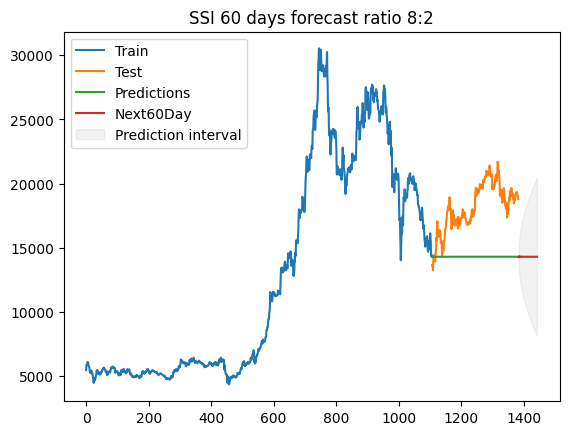

In [76]:
# 8:2 RATIO
# Forecast
n_periods = 60
fc, confint = model_fit82.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df['Close']), len(df['Close'])+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train_data82.index, train_data82['Close'])
plt.plot(test_data82.index, test_data82['Close'])
plt.plot(test_data82.index, y_pred82)

plt.plot(fc_series)
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.05)
plt.legend(['Train', 'Test', 'Predictions','Next60Day', 'Prediction interval'])

plt.title("SSI 60 days forecast ratio 8:2")
plt.show()